# **Pertemuan 2: Basic Concept of Probability Theory**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

In [ ]:
# The note is written in english do to my class lecture notes was written in english, 
# therefore to make my english more fluent I also write this notebook in english.

# Table of Contents
- [A. Discrete Random Variable](#a)
    - [A. 1 Probability Mass Function](#a.1)
    - [A. 2 Cumulative Distribution Function](#a.2)
    - [A. 3 R Simulation of Discrete Random Variable](#a.3)
- [B. Continous Random Variable](#b)
    - [B. 1 Probability Density Function](#b.1)
    - [B. 2 Cumulative Distribution Function](#b.2)
    - [B. 3 R Simulation of Continous Random Variable](#b.3)
- [C. Expectation and Variance of Random Variable](#c)
    - [C. 1 Expectation of Random Variable](#c.1)
    - [C. 2 Variance of Random Variable](#c.2)
    - [C. 3 R Simulation of Expectation and Variance of Random Variable](#c.3)
- [D. Moment and Moment Generating Function](#d)
    - [D. 1 Moment](#d.1)
    - [D. 2 Moment Generating Function](#d.2)

A random variable (r.v.) is a mapping $X: \Omega \rightarrow \mathbb{R}$ that assigns a real number $X(\omega)$ to each outcome $\omega$. 

$X$ is a function defined on sample space $\Omega$.

**Example:** 

Tossing two coins, the random variable defined as $X$ = number of heads.
$$
X = 0 \quad \text{with probability } P(X=0) = P(T,T) = \frac{1}{4}
$$

$$
X = 1 \quad \text{with probability } P(X=1) = P(T,H) + P(H,T) = \frac{2}{4}
$$

$$
X = 2 \quad \text{with probability } P(X=2) = P(H,H) = \frac{1}{4}
$$

A r.v. $X$ is said to be discrete if we can assume only a finite or countably infinite number of distinct values.

## **A. Discrete Random Variable**<a class="anchor" id="a"></a>
<hr>

### **A. 1 Probability Mass Function** <a class="anchor" id="a.1"></a>
**Probability Mass Function** (Discrete r.v.) is defined as

$$
f_X(x) = P(X = x) \quad \text{given that } X = \{x_1, x_2, x_3, \dots\}
$$

$f_X(x)$ is the probability for r.v. \(X\) being exactly \(x\).

PMF is a probability measure that gives us probabilities of the possible values of a r.v.

Thus

$$
f_X(x) \geq 0 \text{ for all } x \in \mathbb{R} \quad \text{and} \quad \sum_i f_X(x_i) = 1
$$

Under r.v. discrete, there is:

$$
P(x_1 \leq X \leq x_2) = P(X=x_1) + P(X=x_2)
$$

$$
P(X \geq x_1) = P(X=x_1) + P(X=x_2) + \cdots
$$

$$
P(x_1 \leq X < x_3) = P(X=x_1) + P(X=x_2)
$$

### **A. 2 Cumulative Distribution Function (CDF)** <a class="anchor" id="a.2"></a>
The cumulative distribution function (CDF) is denoted as $F_X(x)$ and defined as:

$$
F_X(x) = P(X \leq x) = \sum f_X(x)
$$

It is a function that describes the probability that a real-valued random variable $X$ is less than or equal to a certain value $x$.

### **A. 3 PMF and CDF Simulation (Discrete Random Variable)** <a class="anchor" id="a.32"></a>

Here we can make a simulation to show how to count the probability mass function of a random variable.

Take an example of flipping coin, in this example, we just simulate four flipping (of course you can modify by adding `Flip4 = outcomes`, `Flip4 = outcomes` etc to increase the number of flip). Each flipping are independent.
* First, we will generate all the possible possiblities

In [7]:
#######################################################################################
## GENERATING ALL THE POSSIBLE POSSIBILITIES FOR TOSSING A SINGLE COINS FOUR TIMES
#######################################################################################
# Define the possible outcomes for a single coin flip
outcomes <- c("H", "T")

# Generate all possible combinations for four coin flips
combinations <- expand.grid(Flip1 = outcomes, Flip2 = outcomes, Flip3 = outcomes, Flip4 = outcomes)

# Calculate the number of heads in each combination
combinations$Heads_Count <- rowSums(combinations == "H")

# Calculate probabilities by counting occurrences of each head count
head_counts <- table(combinations$Heads_Count)

# Create a probability vector from head counts divided by total combinations
probabilities <- head_counts / nrow(combinations)

# Assign probabilities to each row based on the number of heads
combinations$Probability <- probabilities[as.character(combinations$Heads_Count)]

# Aggregate to find the total probability for each count of heads
probability_summary <- aggregate(Probability ~ Heads_Count, data = combinations, FUN = unique)

# Calculate the cumulative probability
probability_summary$Cumulative_P <- cumsum(probability_summary$Probability)

# Print the combinations with probabilities
print(combinations)

   Flip1 Flip2 Flip3 Flip4 Heads_Count Probability
1      H     H     H     H           4      0.0625
2      T     H     H     H           3      0.2500
3      H     T     H     H           3      0.2500
4      T     T     H     H           2      0.3750
5      H     H     T     H           3      0.2500
6      T     H     T     H           2      0.3750
7      H     T     T     H           2      0.3750
8      T     T     T     H           1      0.2500
9      H     H     H     T           3      0.2500
10     T     H     H     T           2      0.3750
11     H     T     H     T           2      0.3750
12     T     T     H     T           1      0.2500
13     H     H     T     T           2      0.3750
14     T     H     T     T           1      0.2500
15     H     T     T     T           1      0.2500
16     T     T     T     T           0      0.0625


* Second, we will summary all the possibilities of head count and summary their probability

In [9]:
# Print the probability summary table
print(probability_summary)

  Heads_Count Probability Cumulative_P
1           0      0.0625       0.0625
2           1      0.2500       0.3125
3           2      0.3750       0.6875
4           3      0.2500       0.9375
5           4      0.0625       1.0000


* Third, to make it more understandable, we can create a bar chart for the distribution of head count and their probabilities

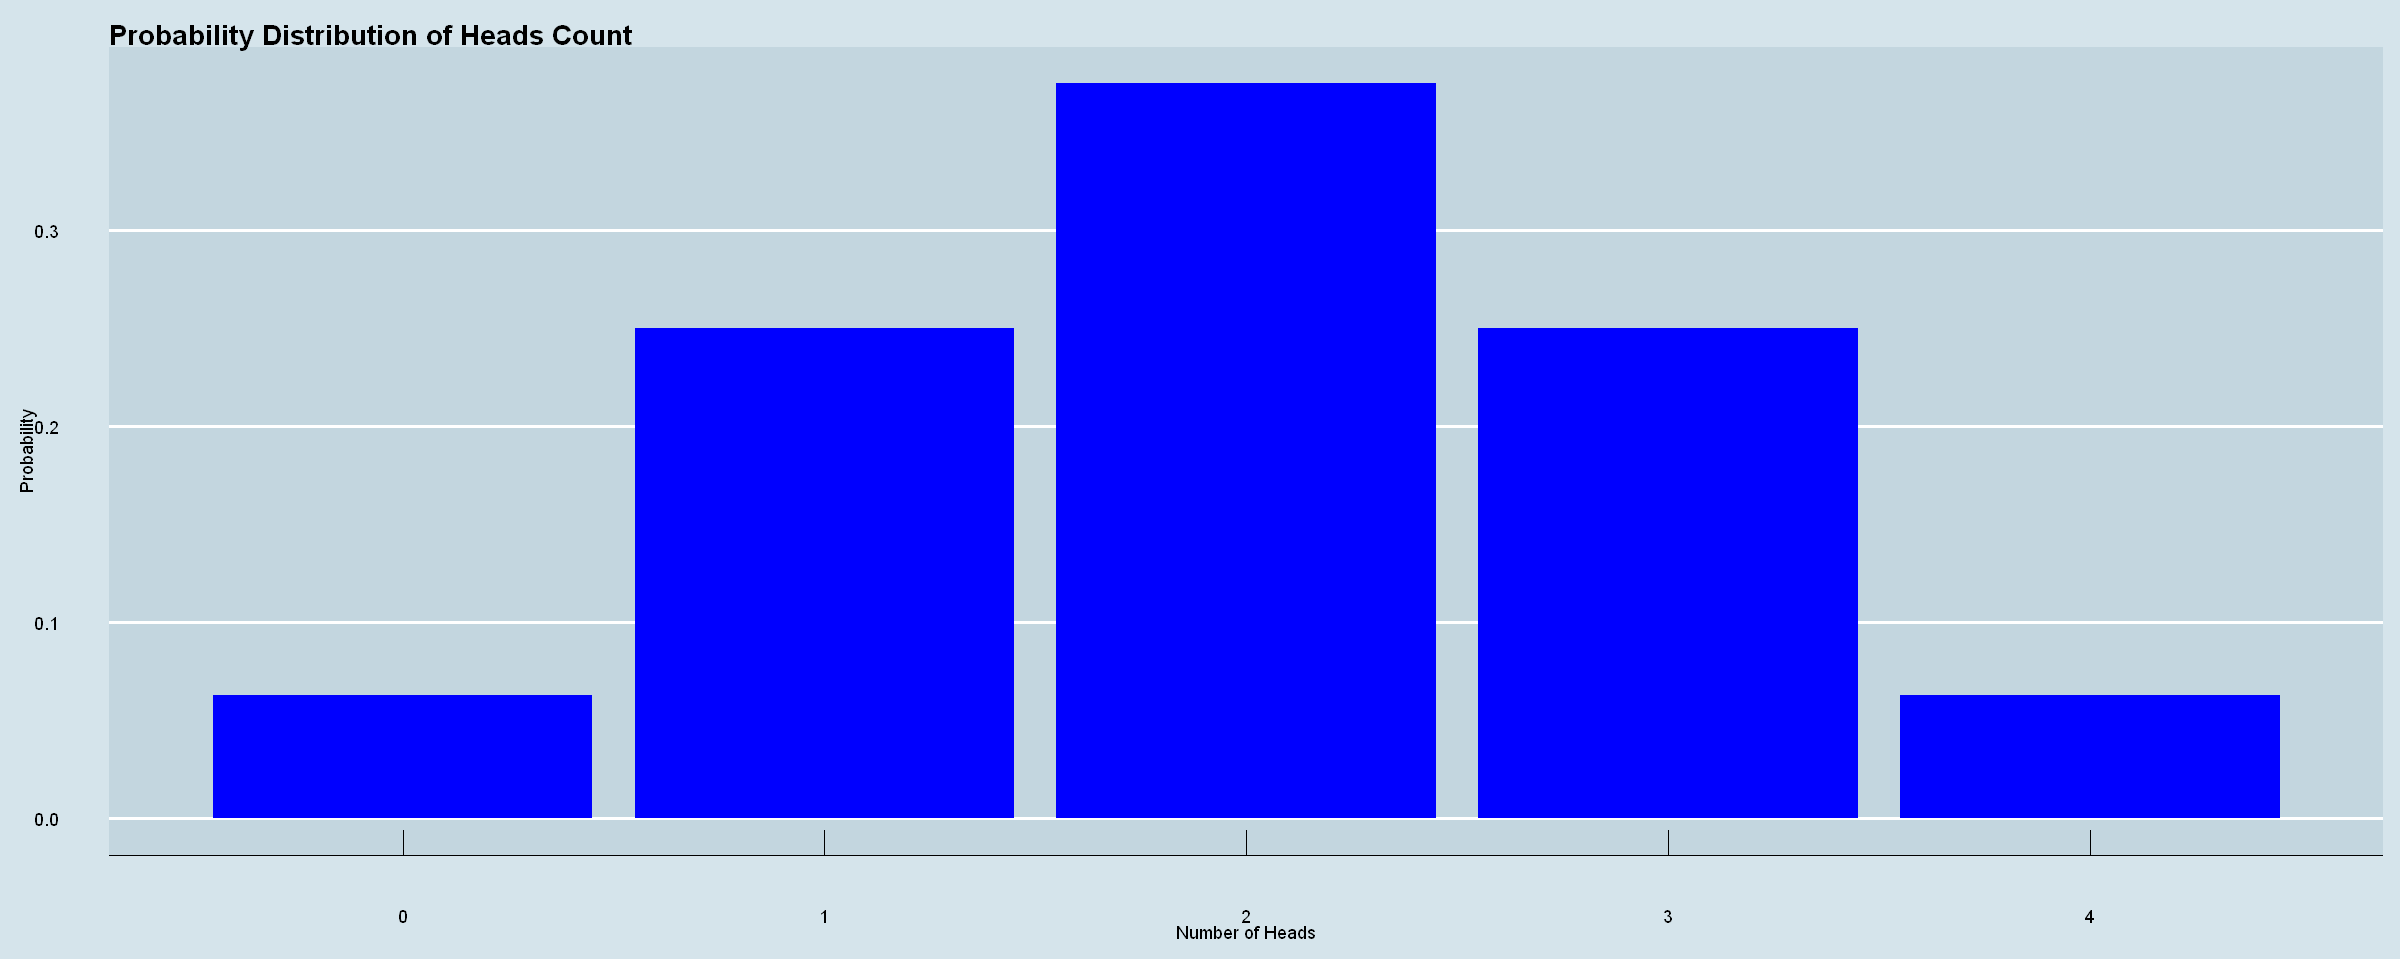

In [16]:
#######################################################################################
## PLOTTING PROBABILITY MEAN FUNCTION (PMF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################

# Now plot using ggplot2 and ggtheme (ggtheme is libarary for some nice theme - here we use the economist theme).
library(ggplot2)
library(ggthemes)

options(repr.plot.width=20, repr.plot.height=8) # this is just to make the plots wider (extend to the end of laptop display) 

ggplot(data = probability_summary, aes(x = Heads_Count, y = Probability)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Number of Heads", y = "Probability", title = "Probability Distribution of Heads Count") +
  theme_economist(base_size = 30, dkpanel=TRUE)

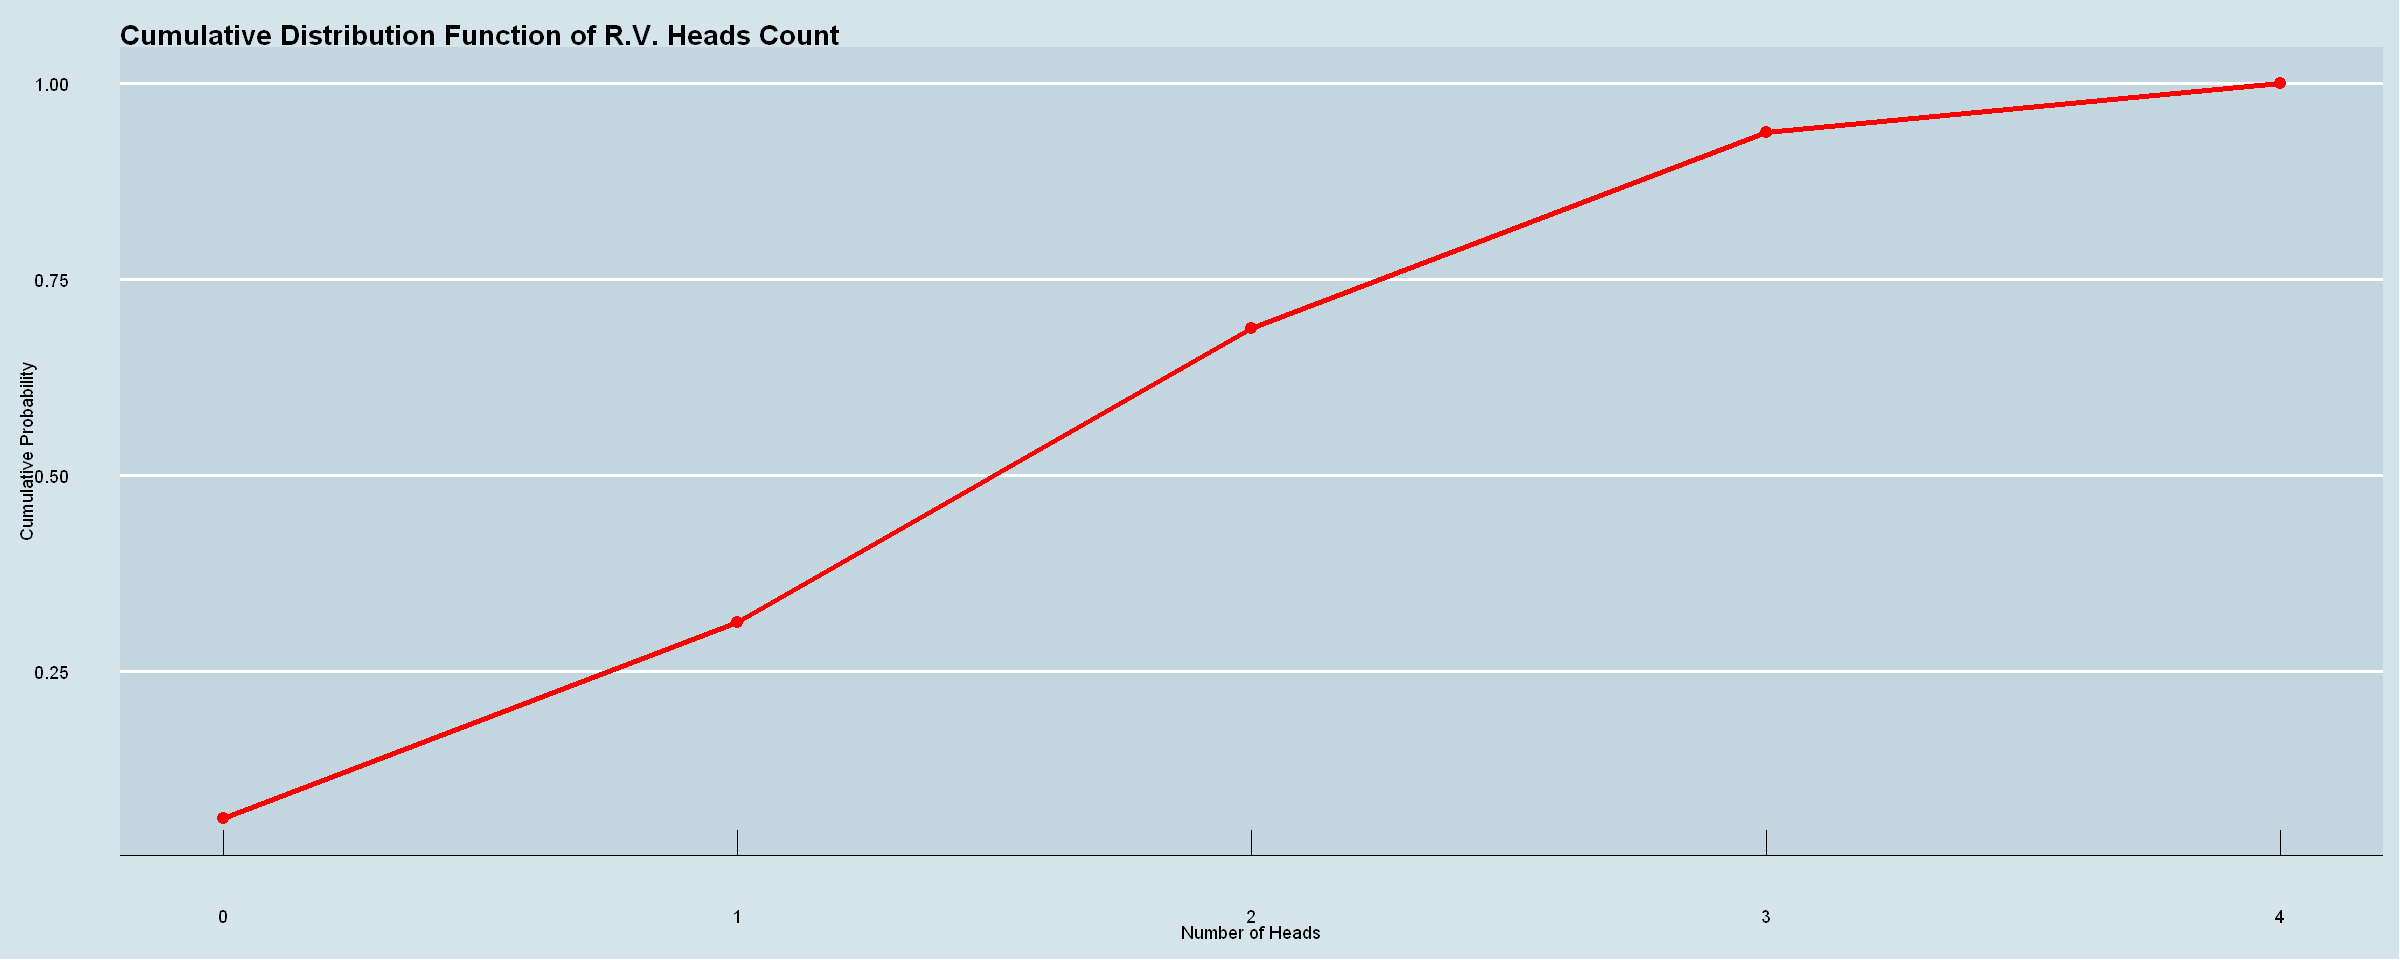

In [17]:
#######################################################################################
## PLOTTING CUMMULATIVE DISTRIBUTION FUNCTION (CDF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################

# Create the line graph for cumulative probabilities
ggplot(data = probability_summary, aes(x = Heads_Count)) +
  geom_line(aes(y = Cumulative_P, group = 1), color = "red", linewidth = 1.5) +  # Updated to use 'linewidth'
  geom_point(aes(y = Cumulative_P), color = "red", size = 3) +
  labs(x = "Number of Heads", y = "Cumulative Probability") +
  ggtitle("Cumulative Distribution Function of R.V. Heads Count") +
  theme_economist(base_size = 30, dkpanel=TRUE)